- Region Mask
- Range Thresholding
- Shape Detection (Hough Transform)

In [2]:
import cv2, numpy as np,math

# REGION MASK

Bitwise Not (~)

In [15]:
img = cv2.imread('../footage/kim-sejeong.jpg')
h,w,c = img.shape

masking = np.zeros((h,w)).astype(np.uint8)
cv2.circle(masking, (w//2, h//2), 200, (255,255,255), -1)

mask_inv = cv2.bitwise_not(img, mask=masking)

cv2.imshow("mask_inv", mask_inv)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [20]:
hand = cv2.imread('../footage/hand.png')
gray_hand = cv2.cvtColor(hand, cv2.COLOR_BGR2GRAY)

ret,thresh = cv2.threshold(gray_hand, 127, 255, cv2.THRESH_BINARY_INV)

masking_inv = cv2.bitwise_not(hand, mask = thresh)

cv2.imshow("binary_inv", thresh)
cv2.imshow("masked", masking_inv)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [9]:
img2 = cv2.imread('../footage/lavender.jpeg')
img2 = cv2.resize(img2, (431, 647))
cv2.imwrite('../footage/lavender-resized.jpeg',img2)

True

Bitwise AND (&)

In [19]:
img1 = cv2.imread('../footage/kim-sejeong.jpg')
img2 = cv2.imread('../footage/lavender-resized.jpeg')
h,w,c = img1.shape

masking = np.zeros((h,w)).astype(np.uint8)
cv2.rectangle(masking, (w//4, h//4), (3*w//4, 3*h//4), (1,0,0), -1)

mask_and =  cv2.bitwise_and(img2,img2, mask = masking)

cv2.imshow("masked", mask_and)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [28]:
img1 = cv2.imread('../footage/kim-sejeong.jpg')
gray_img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray_img1, 100, 255, cv2.THRESH_BINARY)

img2 = cv2.imread('../footage/lavender-resized.jpeg')

mask_and = cv2.bitwise_and(img1, img2, mask = thresh)


cv2.imshow("masked", mask_and)
cv2.waitKey(0)
cv2.destroyAllWindows()

bitwise OR ( || )

In [27]:
img1 = cv2.imread('../footage/kim-sejeong.jpg')
img2 = cv2.imread('../footage/lavender-resized.jpeg')
h,w,c = img1.shape

masking = np.zeros((h,w)).astype(np.uint8)
cv2.circle(masking, (w//2, h//2), 200, (255,255,255), -1)

mask_and = cv2.bitwise_or(img1, img2, mask=masking)

cv2.imshow("mask_inv", mask_and)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [33]:
img1 = cv2.imread('../footage/kim-sejeong.jpg')
gray_img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray_img1, 100, 255, cv2.THRESH_BINARY)

img2 = cv2.imread('../footage/lavender-resized.jpeg')

masking = cv2.bitwise_or(img1,img2, mask=thresh)

cv2.imshow("masked", masking)
cv2.waitKey(0)
cv2.destroyAllWindows()


# RANGE THRESHOLDING

HUE
- Red : -10 - 10
- Orange : 15 - 25
- Yellow : 25 - 35
- Grenn : 50 - 70
- Cyan : 80 - 100
- Blue : 110 - 130

In [52]:
color = np.array([130,255,255], dtype=np.uint8)
bg = np.zeros((200,200,3), dtype=np.uint8)
bg[:] = color

cv2.imshow('IMAGE', bg)
cv2.waitKey(0)
cv2.destroyAllWindows()

coba kita catch block warna biru, hijau, dan merah pada gambar block.jpg 

In [62]:
img = cv2.imread('../footage/blocks.jpg')

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# HSV blue
lower_blue = np.array([110,50,50])
upper_blue = np.array([130,255,255])

# HSV green
lower_green = np.array([50,50,50])
upper_green = np.array([70,255,255])

# HSV red
lower_red = np.array([-10,50,50])
upper_red = np.array([10,255,255])

# addition
# HSV orange
lower_orange = np.array([15,50,50])
upper_orange = np.array([25,255,255])

# HSV cyan
lower_cyan = np.array([80, 50, 50])
upper_cyan = np.array([100, 255, 255])

# HSV yellow
lower_yellow = np.array([25,50,50])
upper_yellow = np.array([35,255,255])

mask_blue = cv2.inRange(hsv.copy(), lower_blue, upper_blue)
mask_green = cv2.inRange(hsv.copy(), lower_green, upper_green)
mask_red = cv2.inRange(hsv.copy(), lower_red, upper_red)
mask_orange = cv2.inRange(hsv.copy(), lower_orange, upper_orange)
mask_cyan = cv2.inRange(hsv.copy(), lower_cyan, upper_cyan)
mask_yellow = cv2.inRange(hsv.copy(), lower_yellow, upper_yellow)


masking = mask_blue + mask_green + mask_red + mask_orange + mask_cyan + mask_yellow

res = cv2.bitwise_and(img, img, mask=masking)

cv2.imshow("res", res)
cv2.imshow("masking", masking)
cv2.imshow("img", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

Task: detect yellow ball

In [2]:
lower_yellow = np.array([25,50,50])
upper_yellow = np.array([35,255,255])

video = cv2.VideoCapture('../footage/yellow_ball.mp4')

while video.isOpened():
    ret, frame = video.read()
    if ret:
        frame = cv2.resize(frame, (0,0), fx=0.5, fy=0.5)
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        masking_yellow = cv2.inRange(hsv.copy(), lower_yellow, upper_yellow)
        res = cv2.bitwise_and(frame, frame, mask=masking_yellow)
        
        cv2.imshow("detected object", res)
        
        if cv2.waitKey(10) == ord('q'):
            break

video.release()
cv2.destroyAllWindows()


# Shape Detection

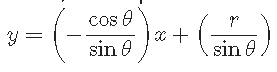

In [8]:
road = cv2.imread('../footage/road.jpg')

gray_road = cv2.cvtColor(road, cv2.COLOR_BGR2GRAY)

edges = cv2.Canny(gray_road, 50,200)

lines = cv2.HoughLines(edges, 1, np.pi / 180 , 100, None, 0,0)

for line in lines:
    rho = line[0][0]
    theta = line[0][1]
    a = math.cos(theta)
    b = math.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1,y1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
    x2,y2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
    cv2.line(road, (x1,y1), (x2,y2), (255,0,0), 1, cv2.LINE_AA)

road1 = cv2.imread('../footage/road.jpg')
cv2.imshow('ori', road1)
cv2.imshow('canny', edges)
cv2.imshow('HoughLine', road)

cv2.waitKey(0)
cv2.destroyAllWindows()


In [23]:
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 50, minLineLength=50, maxLineGap=30)

for line in lines:
    x1,y1,x2,y2 = line[0]
    cv2.line(road, (x1,y1), (x2,y2), (0,255,0), 2)

cv2.imshow("res", road)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [27]:
eye = cv2.imread('../footage/eye.jpg')
h,w,c = eye.shape

gray_eye = cv2.cvtColor(eye, cv2.COLOR_BGR2GRAY)

blur = cv2.GaussianBlur(gray_eye, (5,5), 0,0)

circles = cv2.HoughCircles(blur, cv2.HOUGH_GRADIENT, 1,h/64, param1=200, param2=17, minRadius=21, maxRadius=30)

if circles is not None:
    circles = np.uint16(np.around(circles))[0]
    for i in circles:
        cv2.circle(eye, (i[0], i[1]), i[2], (0,255,0),2)

cv2.imshow("output", eye)
cv2.waitKey(0)
cv2.destroyAllWindows()